In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime, date
sns.set()

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [18]:
df = pd.read_excel("Case Prediction Data2.xlsx")
df.head()

,Case Number,Subject,Date Created,Date Closed,Origin,Priority,Team,Case Type,SLA,Problem Statement,Product,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title
0,204977,Efile Acceptance,2017-01-02 05:39:00,2017-01-03 09:03:00,Web,Medium,Tax Preparation,Efile,Platinum,We transmitted a Michigan return still have no...,Compliance,Returns / Reports,NaN,NaN,US.MI,Answer exists KB,041324813494120,How to understand the Transmission Monitor
1,204979,Oregon STAT help: Previous Case 203787 Client ...,2017-01-02 09:03:00,2017-01-04 16:56:00,Web,High,Tax Preparation,Question / How To,Silver,Oregon STAT help: Previous Case 203787 Client ...,Provision,State,NaN,NaN,US.OR,Customer no longer needs assistance,NaN,NaN
2,204980,Data map incorrectly pulling in values,2017-01-02 11:25:00,2017-01-03 15:48:00,Web,Medium,Tax Preparation,Question / How To,Silver,Corptax Office Import - Credit Account imports...,Office - Excel Add-In,Import / Export,NaN,NaN,US,Answer exists KB,041414821333274,Corptax® Office - How to place an IF formula i...
3,204981,The New Corptax Connect Website is not properl...,2017-01-02 12:06:00,2017-01-03 09:26:00,Web,High,Tax Preparation,Problem / Error,Silver,Searches can't be performed on the new system....,Websites,Connections (https://connect.corptax.com),Error Message,NaN,NaN,Answer exists KB,161216104028927,Connections Error - Uh Oh something went wron...
4,204986,LD400 is not reflecting a temporary adjustment,2017-01-03 07:17:00,2017-01-05 08:21:00,E-mail,Medium,Tax Preparation,Problem / Error,Platinum,LD400 is not reflecting a temporary adjustment,Compliance,Returns / Reports,NaN,NaN,US,Answer exists KB,041622907012748,Adjustments do not flow to LD400 workpaper and...


In [19]:
df["Date Created"] = pd.to_datetime(df["Date Created"])
df["Date Closed"] = pd.to_datetime(df["Date Closed"])

In [20]:
def get_durations(created,closed):
    durations_array_mins = []
    for cr, cl in zip(created,closed):
#         print((cl - cr).days)                    # duration in days
        dur_mins =(cl - cr).total_seconds()/60          # duration in total seconds
        durations_array_mins.append(dur_mins)
    
    return durations_array_mins

dates_created = df["Date Created"].to_list()
dates_closed = df["Date Closed"].to_list()
df["Duration(mins)"] = get_durations(dates_created,dates_closed)

In [21]:
df.Product.value_counts()

Compliance                             110216
International (US)                      28604
Websites                                16459
Provision                                9918
Partnership / S Corp / Pass-Through      9069
Sales Tax                                4338
Office - Excel Add-In                    3799
Application Hosting                      3440
Other                                     798
Calendar                                  768
Data Exchange Manager                     570
WorkSpace                                 529
ODBC Driver - Corptax                     300
Web Services                              199
Claims                                     57
Name: Product, dtype: int64

In [22]:
data1 = df.Product.dropna(inplace=True, axis=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189188 entries, 0 to 189187
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Case Number        189188 non-null  int64         
 1   Subject            189187 non-null  object        
 2   Date Created       189188 non-null  datetime64[ns]
 3   Date Closed        189142 non-null  datetime64[ns]
 4   Origin             189188 non-null  object        
 5   Priority           189188 non-null  object        
 6   Team               189186 non-null  object        
 7   Case Type          185597 non-null  object        
 8   SLA                189149 non-null  object        
 9   Problem Statement  185687 non-null  object        
 10  Product            189064 non-null  object        
 11  Product Area       188973 non-null  object        
 12  Product Category   47138 non-null   object        
 13  Product Type       5082 non-null    object  

In [23]:
data_new = df[["Date Created","Date Closed","Duration(mins)","Subject","Case Type","Product","Product Area"]]
data_sample = data_new.sample(1000)
data_sample

,Date Created,Date Closed,Duration(mins),Subject,Case Type,Product,Product Area
93505,2019-09-16 09:16:00,2019-09-17 19:04:00,2028.0,chart of account base accounts,Question / How To,Compliance,Returns / Reports
65954,2018-11-15 04:26:00,2018-11-15 08:58:00,272.0,Request Login Credentials,Question / How To,Websites,Connections (https://connect.corptax.com)
80621,2019-06-06 11:14:00,2019-06-06 11:15:00,1.0,Form 2220,NaN,Compliance,Returns / Reports
113028,2020-03-05 16:17:00,2020-03-12 12:58:00,9881.0,Changing ownership information,Question / How To,International (US),Configuration / Setup
134179,2020-09-24 19:51:00,2020-09-25 09:23:00,812.0,NAICS Code,Question / How To,Compliance,Returns / Reports
...,...,...,...,...,...,...,...
120216,2020-05-27 08:07:00,2020-05-27 11:08:00,181.0,Issues with 2020.3,Problem / Error,Compliance,Returns / Reports
71675,2019-02-13 17:45:00,2019-02-14 10:02:00,977.0,How to run the BOOKTAXC C-Corporation Book to ...,Question / How To,Compliance,Returns / Reports
60801,2018-10-08 12:39:00,2018-10-10 09:49:00,2710.0,Negative Amounts on Sch. H & Sch. M of LA Form...,Concern,Compliance,Returns / Reports
172684,2021-11-25 08:23:00,2021-11-29 08:15:00,5752.0,KY720U Rejection,Efile,Compliance,Returns / Reports


In [24]:
data_new["date_only"] = data_new["Date Created"].dt.date
data_new

/Users/ankush.singal/opt/anaconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date Created,Date Closed,Duration(mins),Subject,Case Type,Product,Product Area,date_only
0,2017-01-02 05:39:00,2017-01-03 09:03:00,1644.0,Efile Acceptance,Efile,Compliance,Returns / Reports,2017-01-02
1,2017-01-02 09:03:00,2017-01-04 16:56:00,3353.0,Oregon STAT help: Previous Case 203787 Client ...,Question / How To,Provision,State,2017-01-02
2,2017-01-02 11:25:00,2017-01-03 15:48:00,1703.0,Data map incorrectly pulling in values,Question / How To,Office - Excel Add-In,Import / Export,2017-01-02
3,2017-01-02 12:06:00,2017-01-03 09:26:00,1280.0,The New Corptax Connect Website is not properl...,Problem / Error,Websites,Connections (https://connect.corptax.com),2017-01-02
4,2017-01-03 07:17:00,2017-01-05 08:21:00,2944.0,LD400 is not reflecting a temporary adjustment,Problem / Error,Compliance,Returns / Reports,2017-01-03
...,...,...,...,...,...,...,...,...
189183,2022-08-15 20:04:00,2022-08-16 16:27:00,1223.0,Possible Wrong Calculation for LA Plaquemines ...,Problem / Error,Sales Tax,Returns / Reports,2022-08-15
189184,2022-08-15 20:05:00,2022-08-16 17:37:00,1292.0,Sch. L and M-2 not populating in Short Period ...,Question / How To,Compliance,Returns / Reports,2022-08-15
189185,2022-08-15 20:22:00,2022-08-16 13:57:00,1055.0,Legacy Form 8992 GILTI Calculation,Question / How To,Compliance,Returns / Reports,2022-08-15
189186,2022-08-15 20:45:00,2022-08-17 17:32:00,2687.0,VA Efile Diagnostics - not due 8/15,Efile,Compliance,Returns / Reports,2022-08-15


In [25]:
# ticket_count = data_new.groupby(by="date_only",as_index=False).aggregate("count")[["date_only","Subject"]].rename(columns={"Subject":"count"})
# ticket_count["year"] = pd.to_datetime(ticket_count["year"])
data_new["date_only"] = pd.to_datetime(data_new["date_only"])
data_new["year"] = data_new["date_only"].dt.year
data_new["month"] = data_new["date_only"].dt.month
ticket_count = data_new.groupby(by=["year","month"],as_index=False).size()

/Users/ankush.singal/opt/anaconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ankush.singal/opt/anaconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/ankush.singal/opt/anaconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: Se

In [26]:
ticket_count

,year,month,size
0,2017,1,2206
1,2017,2,2377
2,2017,3,3326
3,2017,4,2186
4,2017,5,2581
...,...,...,...
63,2022,4,1871
64,2022,5,1787
65,2022,6,2112
66,2022,7,1959


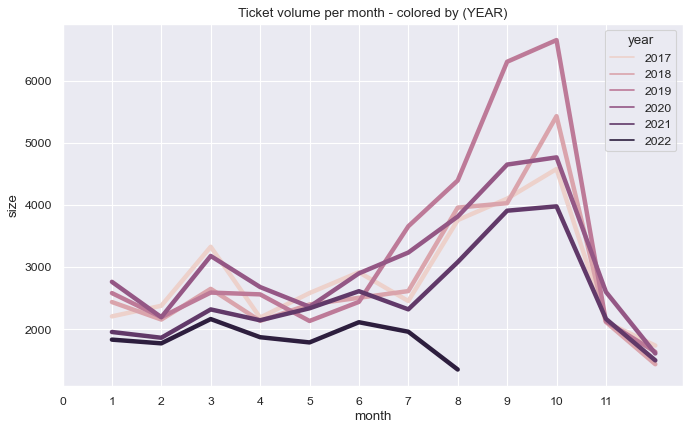

In [27]:
fig = plt.figure(figsize=(10,6),dpi=80)
sns.lineplot(data=ticket_count, x="month",y="size",hue="year",style="year",dashes=False,linewidth=4).set(title='Ticket volume per month - colored by (YEAR)')
plt.xticks(np.arange(0, max(ticket_count["month"].to_list()), 1))
plt.show()

# Word frequency analysis

<AxesSubplot:>

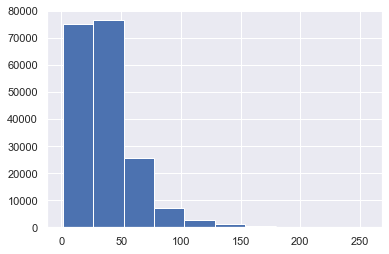

In [28]:
df['Subject'].str.len().hist()

# AVERAGE WORD LENGTH

In [42]:
df['Subject'] = df['Subject'].astype(str)

In [43]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

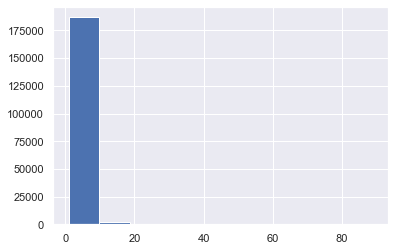

In [44]:
plot_word_length_histogram(df['Subject'])

# TOP STOPWORDS

In [35]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankush.singal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
df['Subject'] = df['Subject'].astype(str)

In [39]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

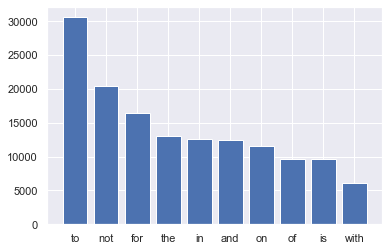

In [40]:
plot_top_stopwords_barchart(df['Subject'])

# Top Non-Stopwords Barchart

In [45]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

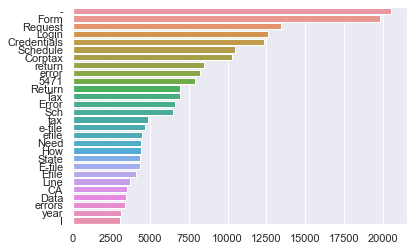

In [46]:
plot_top_non_stopwords_barchart(df['Subject'])

# Ngram exploration
Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

To implement n-grams we will use ngrams function from nltk.util. For example:

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

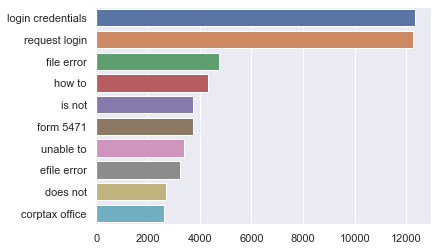

In [48]:
plot_top_ngrams_barchart(df['Subject'],2)

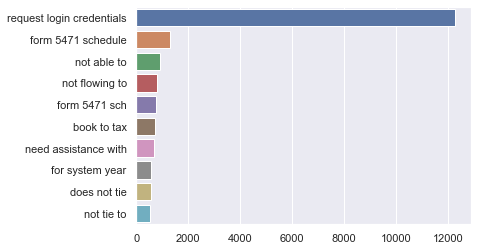

In [49]:
plot_top_ngrams_barchart(df['Subject'],3)

# Wordcloud
Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.

Creating wordcloud in python with is easy but we need the data in a form of a corpus. Luckily, I prepared it in the previous section.

In [75]:
#!pip install wordcloud

In [73]:

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankush.singal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/ankush.singal/opt/anaconda3/envs/ml_env/lib/python3.7/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/ankush.singal/opt/anaconda3/envs/ml_env/lib/python3.7/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/ankush.singal/opt/anaconda3/envs/ml_env/lib/python3.7/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font

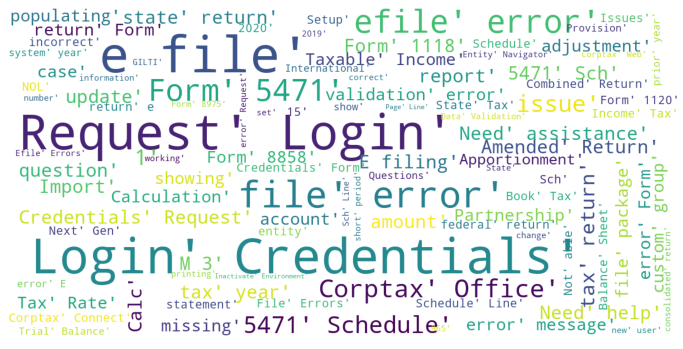

In [74]:
plot_wordcloud(df['Subject'])